MULTICLASS CLASSIFICATION MODEL

The flowers dataset is well studied and is a good problem for practicing on neural networks because all of the 4 input variables are numeric and have the same scale in centimeters. Each instance describes the properties of an observed flower measurements and the output variable is specific iris species.

This is a multi-class classification problem, meaning that there are more than two classes to be predicted, in fact there are three flower species. This is an important type of problem on which to practice with neural networks because the three class values require specialized handling.

The iris flower dataset is a well-studied problem and a such we can expect to achieve a model accuracy in the range of 95% to 97%. This provides a good target to aim for when developing our models.

Yada yada!

In [1]:
# import libraries

import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
# import dataframe
# add header names as the orig csv does not have them and uses the 1st row as header row(!)

df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv',
                         names=['X1', 'X2', 'X3', 'X4', 'Name'])

In [3]:
df


,X1,X2,X3,X4,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.iloc[:1, :]

,X1,X2,X3,X4,Name
0,5.1,3.5,1.4,0.2,Iris-setosa


In [5]:
print(df['X1'].max(), df['X2'].max(),df['X3'].max(),df['X4'].max())

print(df['X1'].min(), df['X2'].min(),df['X3'].min(),df['X4'].min())

# they're already in numbers, let's feature scale them using normalisation (vals from 0 to 1)

7.9 4.4 6.9 2.5
4.3 2.0 1.0 0.1


In [6]:
df['Name'].value_counts()

# equal samples per class name, no class imbalance

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Name, dtype: int64

In [7]:
# normalise X vars

mms = MinMaxScaler()

df.iloc[:, :4] = mms.fit_transform(df.iloc[:, :4])

In [8]:
df

,X1,X2,X3,X4,Name
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa
2,0.111111,0.500000,0.050847,0.041667,Iris-setosa
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,Iris-virginica
146,0.555556,0.208333,0.677966,0.750000,Iris-virginica
147,0.611111,0.416667,0.711864,0.791667,Iris-virginica
148,0.527778,0.583333,0.745763,0.916667,Iris-virginica


In [9]:
print(df['X1'].max(), df['X2'].max(),df['X3'].max(),df['X4'].max())

print(df['X1'].min(), df['X2'].min(),df['X3'].min(),df['X4'].min())

1.0 1.0 1.0 1.0
0.0 0.0 0.0 0.0


In [10]:
# define X and y

X = df.iloc[:, :4]

y = df[['Name']]

In [11]:
'''# label encode the target variable

le = LabelEncoder()

df.iloc[:, -1] = le.fit_transform(df.iloc[:, -1])
'''
# label encode the target variable

ohe = OneHotEncoder(sparse=False)

y = ohe.fit_transform(y)

'''
ohe = OneHotEncoder(sparse=False)

y = df[['breast-quad']] # add double square brackets or we'll get a shape error

y = ohe.fit_transform(y)'''


"\nohe = OneHotEncoder(sparse=False)\n\ny = df[['breast-quad']] # add double square brackets or we'll get a shape error\n\ny = ohe.fit_transform(y)"

In [12]:


# define training, validation and test sets

# get training, validation and test datasets (80:10:10 ratio)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=12) # NB random_state=12
 
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

 
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42) # NB random_state=42
 
print(X_val.shape, y_val.shape, X_test.shape, y_test.shape)


print('X_train: ' + str(X_train))
 
print('y_train: ' + str(y_train))
 
print('X_val: ' + str(X_val))
 
print('y_val: ' + str(y_val))
 
print('X_test: ' + str(X_test))
 
print('y_test: ' + str(y_test))



(120, 4) (120, 3) (30, 4) (30, 3)
(15, 4) (15, 3) (15, 4) (15, 3)
X_train:            X1        X2        X3        X4
17   0.222222  0.625000  0.067797  0.083333
81   0.333333  0.166667  0.457627  0.375000
103  0.555556  0.375000  0.779661  0.708333
33   0.333333  0.916667  0.067797  0.041667
101  0.416667  0.291667  0.694915  0.750000
..        ...       ...       ...       ...
76   0.694444  0.333333  0.644068  0.541667
3    0.083333  0.458333  0.084746  0.041667
130  0.861111  0.333333  0.864407  0.750000
134  0.500000  0.250000  0.779661  0.541667
75   0.638889  0.416667  0.576271  0.541667

[120 rows x 4 columns]
y_train: [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0.

In [13]:
# create model

tf.random.set_seed(42)


model_1 = keras.Sequential([                     
  keras.layers.Dense(4, activation='relu'),
  keras.layers.Dense(3, activation='softmax')
])


model_1.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics='accuracy')


history_model_1 = model_1.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=6,
    verbose=2
)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Epoch 1/6


2022-02-08 17:04:40.426707: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-08 17:04:40.427052: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-02-08 17:04:40.488509: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-02-08 17:04:40.710709: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


4/4 - 1s - loss: 1.0595 - accuracy: 0.6583 - val_loss: 1.0578 - val_accuracy: 0.7333 - 1s/epoch - 279ms/step
Epoch 2/6
4/4 - 0s - loss: 1.0566 - accuracy: 0.6583 - val_loss: 1.0548 - val_accuracy: 0.7333 - 45ms/epoch - 11ms/step
Epoch 3/6
4/4 - 0s - loss: 1.0537 - accuracy: 0.6583 - val_loss: 1.0517 - val_accuracy: 0.7333 - 54ms/epoch - 14ms/step
Epoch 4/6
4/4 - 0s - loss: 1.0509 - accuracy: 0.6583 - val_loss: 1.0489 - val_accuracy: 0.7333 - 50ms/epoch - 12ms/step


2022-02-08 17:04:41.589330: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 5/6
4/4 - 0s - loss: 1.0480 - accuracy: 0.6583 - val_loss: 1.0461 - val_accuracy: 0.6667 - 52ms/epoch - 13ms/step
Epoch 6/6
4/4 - 0s - loss: 1.0450 - accuracy: 0.6583 - val_loss: 1.0432 - val_accuracy: 0.6667 - 51ms/epoch - 13ms/step


Text(0.5, 0, 'epochs')

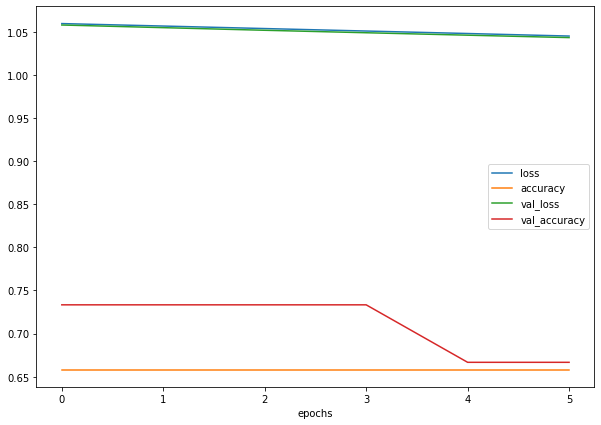

In [14]:
# plot loss curve

pd.DataFrame(history_model_1.history).plot(figsize=(10,7))
plt.xlabel('epochs')


In [15]:
model_1.evaluate(X_test, y_test)


1/1 [==============================] - 0s 16ms/step - loss: 1.0541 - accuracy: 0.6667


[1.0540560483932495, 0.6666666865348816]

In [16]:
y_pred = model_1.predict(X_test)

y_pred, y_pred.argmax(axis=-1), y_test.argmax(axis=-1), len(y_pred)

# 13 of 15 correct, ie 87% accuracy
# array([2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0]),
# array([1, 2, 1, 1, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0]),


2022-02-08 17:04:42.115604: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


(array([[0.27552643, 0.37201253, 0.352461  ],
        [0.2644477 , 0.37983546, 0.35571688],
        [0.28295967, 0.36682785, 0.3502125 ],
        [0.29158723, 0.36087132, 0.34754142],
        [0.25840825, 0.38415042, 0.3574413 ],
        [0.33536848, 0.3315611 , 0.33307043],
        [0.33536848, 0.3315611 , 0.33307043],
        [0.33536848, 0.3315611 , 0.33307043],
        [0.33536848, 0.3315611 , 0.33307043],
        [0.33536848, 0.3315611 , 0.33307043],
        [0.2639656 , 0.38017857, 0.3558559 ],
        [0.24870276, 0.39116344, 0.3601338 ],
        [0.26654   , 0.37834898, 0.355111  ],
        [0.33536848, 0.3315611 , 0.33307043],
        [0.33536848, 0.3315611 , 0.33307043]], dtype=float32),
 array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0]),
 array([1, 2, 1, 1, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0]),
 15)

In [17]:
# create model
# model from: https://www.kaggle.com/venkatkrishnan/iris-data-tensorflow-neural-network 

tf.random.set_seed(42)


model_2 = keras.Sequential([                   
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(500, activation='relu',),
        keras.layers.Dense(300, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(3, activation='softmax')
])


model_2.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics='accuracy')


history_model_2 = model_2.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    verbose=2
)

Epoch 1/100


2022-02-08 17:04:42.382122: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


4/4 - 1s - loss: 1.0151 - accuracy: 0.5583 - val_loss: 0.9142 - val_accuracy: 0.5333 - 657ms/epoch - 164ms/step
Epoch 2/100
4/4 - 0s - loss: 0.7854 - accuracy: 0.6583 - val_loss: 0.7381 - val_accuracy: 0.6000 - 58ms/epoch - 15ms/step
Epoch 3/100
4/4 - 0s - loss: 0.5893 - accuracy: 0.6500 - val_loss: 0.5679 - val_accuracy: 0.6000 - 61ms/epoch - 15ms/step


2022-02-08 17:04:42.839118: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 4/100
4/4 - 0s - loss: 0.4779 - accuracy: 0.7333 - val_loss: 0.4436 - val_accuracy: 0.8667 - 56ms/epoch - 14ms/step
Epoch 5/100
4/4 - 0s - loss: 0.4050 - accuracy: 0.8667 - val_loss: 0.4192 - val_accuracy: 0.6667 - 55ms/epoch - 14ms/step
Epoch 6/100
4/4 - 0s - loss: 0.3505 - accuracy: 0.8333 - val_loss: 0.3006 - val_accuracy: 0.9333 - 55ms/epoch - 14ms/step
Epoch 7/100
4/4 - 0s - loss: 0.2768 - accuracy: 0.9250 - val_loss: 0.2531 - val_accuracy: 0.9333 - 54ms/epoch - 14ms/step
Epoch 8/100
4/4 - 0s - loss: 0.2699 - accuracy: 0.8750 - val_loss: 0.3116 - val_accuracy: 0.8667 - 55ms/epoch - 14ms/step
Epoch 9/100
4/4 - 0s - loss: 0.2258 - accuracy: 0.9250 - val_loss: 0.2034 - val_accuracy: 0.9333 - 52ms/epoch - 13ms/step
Epoch 10/100
4/4 - 0s - loss: 0.1896 - accuracy: 0.9250 - val_loss: 0.2698 - val_accuracy: 0.8667 - 53ms/epoch - 13ms/step
Epoch 11/100
4/4 - 0s - loss: 0.1787 - accuracy: 0.9333 - val_loss: 0.1803 - val_accuracy: 0.8667 - 52ms/epoch - 13ms/step
Epoch 12/100
4/4 - 0s 

Text(0.5, 0, 'epochs')

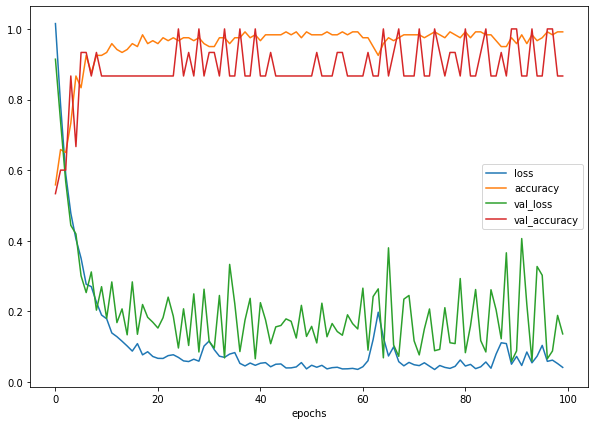

In [18]:
# plot loss curve

pd.DataFrame(history_model_2.history).plot(figsize=(10,7))
plt.xlabel('epochs')


In [19]:
model_2.evaluate(X_test, y_test)

# accuracy: 1 (!)

1/1 [==============================] - 0s 17ms/step - loss: 0.0036 - accuracy: 1.0000


[0.003636186709627509, 1.0]

In [20]:
y_pred = model_2.predict(X_test)

y_pred, y_pred.argmax(axis=-1), y_test.argmax(axis=-1), len(y_pred)

# 15 out of 15 right!
# array([1, 2, 1, 1, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0]),
# array([1, 2, 1, 1, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0]),


2022-02-08 17:04:48.832035: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


(array([[7.1242423e-04, 9.9678552e-01, 2.5020160e-03],
        [1.0558182e-05, 1.0455415e-02, 9.8953396e-01],
        [7.3415873e-04, 9.9298465e-01, 6.2812660e-03],
        [3.5726978e-04, 9.9931037e-01, 3.3239930e-04],
        [4.8206959e-07, 9.9081488e-04, 9.9900872e-01],
        [9.9999487e-01, 5.1626821e-06, 6.3444123e-14],
        [9.9999964e-01, 3.1700273e-07, 8.0724617e-16],
        [9.9999940e-01, 5.8024438e-07, 2.1999697e-15],
        [9.9999869e-01, 1.2865662e-06, 4.9517110e-15],
        [9.9999988e-01, 1.5687365e-07, 1.9950891e-16],
        [6.3870328e-07, 7.9545943e-04, 9.9920398e-01],
        [1.1665416e-05, 1.2642431e-02, 9.8734587e-01],
        [3.0979234e-05, 1.8339437e-02, 9.8162961e-01],
        [9.9999988e-01, 9.3116959e-08, 6.3896897e-17],
        [1.0000000e+00, 2.0104617e-08, 3.0679935e-18]], dtype=float32),
 array([1, 2, 1, 1, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0]),
 array([1, 2, 1, 1, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0]),
 15)

Note the difference in model architecture: 
- In model_1 I used two hidden layers, a few units per hidden layer and results were good qith over 80% y_pred accuracy.
- Then I found a user's [approach](https://www.kaggle.com/venkatkrishnan/iris-data-tensorflow-neural-network) to the multiclass classification model with more layers, many more hidden units (neurons), a Dropout layer and 100 epochs.
- Their model yielded even better results - 100% y_pred accuracy.